In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tempfile
import seaborn as sns
sns.set(style="darkgrid")

import logging
logging.getLogger().setLevel(logging.INFO)

from banditpylib import trials_to_dataframe
from banditpylib.bandits import LinearBandit
from banditpylib.arms import GaussianArm
from banditpylib.protocols import SinglePlayerProtocol
from banditpylib.learners.linear_bandit_learner import LinUCB
from banditpylib.learners.mab_learner import UCB

In [2]:
num_arms = 100
horizon = 2000
delta = 1 / horizon
lambda_reg = 1e-3

In [3]:
features = [np.random.normal(0, size=5) for _ in range(num_arms)]
for i in range(len(features)):
  features[i] = features[i] / np.linalg.norm(features[i])

theta = np.random.normal(0, size=5)

In [4]:
bandit = LinearBandit(features, theta)
learners = [LinUCB(features, delta, lambda_reg), UCB(num_arms)]

In [5]:
intermediate_horizons = list(range(0, horizon+1, 50))
temp_file = tempfile.NamedTemporaryFile()

In [6]:
game = SinglePlayerProtocol(bandit, learners)

In [7]:
game.play(200, temp_file.name, intermediate_horizons=intermediate_horizons, horizon=horizon)

INFO:absl:start linucb's play with linear_bandit
INFO:absl:linucb's play with linear_bandit runs 32.66 seconds.
INFO:absl:start ucb's play with linear_bandit
INFO:absl:ucb's play with linear_bandit runs 48.30 seconds.


In [8]:
trials_df = trials_to_dataframe(temp_file.name)

In [9]:
trials_df.head()

,rounds,total_actions,regret,other,bandit,learner
0,0,0,0.000000,0.0,linear_bandit,linucb
1,50,50,52.181046,0.0,linear_bandit,linucb
2,100,100,77.449490,0.0,linear_bandit,linucb
3,150,150,99.109310,0.0,linear_bandit,linucb
4,200,200,115.563660,0.0,linear_bandit,linucb


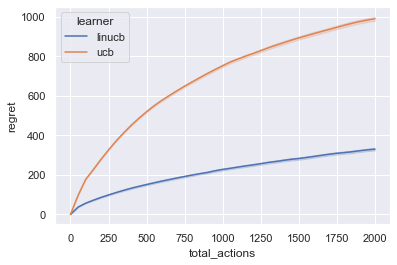

In [10]:
sns.lineplot(x='total_actions', y='regret', hue='learner', data=trials_df)
plt.show()